The exploration should have a goal. As you explore the data, keep in mind that you want to answer which type of shows to produce and how to grow the business.
Ensure each recommendation is backed by data. The company is looking for data-driven insights, not personal opinions or anecdotes.
Assume that you are presenting your findings to business executives who have only a basic understanding of data science. Avoid unnecessary technical jargon.
Start by exploring a few questions: What type of content is available in different countries?
How has the number of movies released per year changed over the last 20-30 years?
Comparison of tv shows vs. movies.
What is the best time to launch a TV show?
Analysis of actors/directors of different types of shows/movies.
Does Netflix has more focus on TV Shows than movies in recent years
Understanding what content is available in different countries
Evaluation Criteria (100 Points):

1. Defining Problem Statement and Analysing basic metrics

2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

3. Non-Graphical Analysis: Value counts and unique attributes 

4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country

4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis 

4.2 For categorical variable(s): Boxplot 

4.3 For correlation: Heatmaps, Pairplots 

5. Missing Value & Outlier check (Treatment optional) 

6. Insights based on Non-Graphical and Visual Analysis

6.1 Comments on the range of attributes

6.2 Comments on the distribution of the variables and relationship between them

6.3 Comments for each univariate and bivariate plot

7. Business Insights  - Should include patterns observed in the data along with what you can infer from it

8. Recommendations  - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary (10 Points) 

In [2]:
os.chdir('C:\\Users\Ashok kumar\Desktop\chanu\DSML_Course\Class Files')

### Read CSV

df = pd.read_csv('netflix.csv')

In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [6]:
df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [7]:
# we can convert type into category value

In [8]:
df.loc[df.type == 'Movie', 'type'] = 1

In [9]:
df.loc[df.type == 'TV Show', 'type'] = 0

In [10]:
df['type'] = df['type'].astype('int32')

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,1,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,0,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,0,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,0,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,0,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
df.type.value_counts()

1    6131
0    2676
Name: type, dtype: int64

In [13]:
df.release_year.value_counts().reset_index().sort_values('index').head()

,index,release_year
70,1925,1
67,1942,2
58,1943,3
54,1944,3
53,1945,4


we can see that after 1925 there are no movies/tv shows released till 1942, so we can consider that 1925 as an outlier and take possible actions

In [14]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [15]:
# There are some durations present in rating,so checking if there are any null values in duration feature.

In [16]:
df.duration.isna().sum()
# there are 3 null values in duration.

3

In [17]:
df.loc[df.duration.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,1,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,1,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,1,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [18]:
#lets replace fill the duration null values
df.loc[df.duration.isna(),'duration'] = df.loc[df.duration.isna(),'rating']

In [19]:
df.duration.isna().sum()

0

In [20]:
df.loc[df.director == 'Louis C.K.']
#replaced the duration and there are no null values

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,1,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,1,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,1,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [21]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   int32         
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(9)
memory usage: 791.4+ KB


In [23]:
df['year_added'] = df['date_added'].dt.year

In [24]:
# we can find the null values in the year_added, for now we will assume that they are released directly in netflix so release year
#and date added, year added are same
df.loc[df.year_added.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
6066,s6067,0,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",NaN
6174,s6175,0,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...,NaN
6795,s6796,0,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...,NaN
6806,s6807,0,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...,NaN
6901,s6902,0,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe...",NaN
7196,s7197,0,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaN
7254,s7255,0,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",NaN
7406,s7407,0,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaN
7847,s7848,0,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaN
8182,s8183,0,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",NaN


In [25]:
df.loc[df.year_added.isna(),'year_added'] = df.loc[df.year_added.isna(),'release_year']  

In [26]:
df.loc[df.date_added.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
6066,s6067,0,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",2013.0
6174,s6175,0,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...,2018.0
6795,s6796,0,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...,2003.0
6806,s6807,0,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...,2003.0
6901,s6902,0,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe...",2008.0
7196,s7197,0,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,2010.0
7254,s7255,0,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",2012.0
7406,s7407,0,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",2016.0
7847,s7848,0,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",2015.0
8182,s8183,0,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",2015.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   int32         
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8807 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(9)
memory usage: 860.2+ KB


In [28]:
df.loc[df.rating.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
5989,s5990,1,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...,2017.0
6827,s6828,0,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel...",2016.0
7312,s7313,0,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take...",2018.0
7537,s7538,1,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c...",2017.0


In [29]:
df['year_added'] = df['year_added'].astype('int32')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   int32         
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8807 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(9)
memory usage: 825.8+ KB


In [31]:
df.year_added.value_counts().sort_values(ascending=False)

2019    2016
2020    1879
2018    1650
2021    1498
2017    1188
2016     430
2015      84
2014      24
2011      13
2013      12
2012       4
2008       3
2009       2
2003       2
2010       2
Name: year_added, dtype: int64

In [32]:
df.year_added.nunique()

15

From above we can say that no content was upoloaded to Netflix during 2004-2007, so we can consider 2003 as an outlier

In [33]:
df.describe()

,type,release_year,year_added
count,8807.000000,8807.000000,8807.000000
mean,0.696151,2014.180198,2018.863291
std,0.459944,8.819312,1.602696
min,0.000000,1925.000000,2003.000000
25%,0.000000,2013.000000,2018.000000
50%,1.000000,2017.000000,2019.000000
75%,1.000000,2019.000000,2020.000000
max,1.000000,2021.000000,2021.000000


->From the above statistical analysis we can infer that there are total 8807 movies and TV shows combined in Netflix from the years 1925 to 2021. there are more number of movies when compared to TV shows. 
-> TV shows or movies are added into netflix 2 years after they are released.

# Non-Graphical Analysis: Value counts and unique attributes (10 Points)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   int32         
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8807 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(9)
memory usage: 825.8+ KB


In [35]:
# from type we can say that there are only two kinds of content is present in netflix : Movies(1) and TV Shows(0) and 
# #_of_Movies > #_of_TV_Shows
# both combined there are total 8807 shows in netflix

In [36]:
df.type.value_counts()

1    6131
0    2676
Name: type, dtype: int64

In [37]:
# Most number of movies added in the year 2019 when compared to all other years
df.year_added.value_counts().sort_values(ascending=False)

2019    2016
2020    1879
2018    1650
2021    1498
2017    1188
2016     430
2015      84
2014      24
2011      13
2013      12
2012       4
2008       3
2009       2
2003       2
2010       2
Name: year_added, dtype: int64

In [38]:
#from the above result we can say that netflix started adding movies/tv shows from the year 2003 and later that it didnt added
# any content till 2008
df.year_added.nunique()

15

In [39]:
# Most number of movies released in the year of 2018
df.release_year.value_counts().sort_values(ascending=False)

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [40]:
df.year_added.nunique()

15

In [41]:
# we have converted the movie duration into only numerical value to generate some insights
df.loc[df.type == 1,'duration']=df.duration.apply(lambda x: str(x).split()[0])

In [42]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,1,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,0,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,0,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,0,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,0,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


In [43]:
#
duration_df=df.loc[df.type==1,'duration'].astype('int32')

In [44]:
duration_df=duration_df.reset_index()

In [45]:
duration_df=duration_df.sort_values('duration')

<AxesSubplot:xlabel='duration', ylabel='Count'>

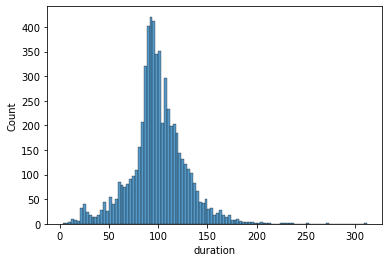

In [46]:
sns.histplot(data = duration_df,x='duration')

In [47]:
duration_df.duration.min()

3

In [48]:
duration_df.duration.max()

312

In [49]:
director_df = df['director'].apply(lambda x: str(x).split(',')).to_list()
director_df = pd.DataFrame(director_df,index = df['title'])
director_df=director_df.stack()
director_df = pd.DataFrame(director_df)
director_df.reset_index(inplace = True)
director_df = director_df[['title',0]]
director_df.columns=['title','director']
director_df['director'] = director_df['director'].apply(lambda x : x.strip())
director_df.head()

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [50]:
cast_df = df['cast'].apply(lambda x: str(x).split(',')).to_list()
cast_df = pd.DataFrame(cast_df,index = df['title'])
cast_df=cast_df.stack()
cast_df = pd.DataFrame(cast_df)
cast_df.reset_index(inplace = True)
cast_df = cast_df[['title',0]]
cast_df.columns=['title','cast']
cast_df['cast'] = cast_df['cast'].apply(lambda x : x.strip())
cast_df.head()

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [51]:
country_df = df['country'].apply(lambda x: str(x).split(',')).to_list()
country_df = pd.DataFrame(country_df,index = df['title'])
country_df = country_df.stack()
country_df = pd.DataFrame(country_df)
country_df.reset_index(inplace = True)
country_df = country_df[['title',0]]
country_df.columns=['title','country']
country_df['country'] = country_df['country'].apply(lambda x : x.strip())
country_df.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


In [52]:
listed_in_df = df['listed_in'].apply(lambda x: str(x).split(',')).to_list()
listed_in_df = pd.DataFrame(listed_in_df,index = df['title'])
listed_in_df = listed_in_df.stack()
listed_in_df = pd.DataFrame(listed_in_df)
listed_in_df.reset_index(inplace = True)
listed_in_df = listed_in_df[['title',0]]
listed_in_df.columns=['title','listed_in']
listed_in_df['listed_in'] = listed_in_df['listed_in'].apply(lambda x : x.strip())
listed_in_df.head()

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [53]:
dir_cas_df = director_df.merge(cast_df,how='inner',left_on='title',right_on='title')
dir_cas_df

,title,director,cast
0,Dick Johnson Is Dead,Kirsten Johnson,nan
1,Blood & Water,nan,Ama Qamata
2,Blood & Water,nan,Khosi Ngema
3,Blood & Water,nan,Gail Mabalane
4,Blood & Water,nan,Thabang Molaba
...,...,...,...
70807,Zubaan,Mozez Singh,Manish Chaudhary
70808,Zubaan,Mozez Singh,Meghna Malik
70809,Zubaan,Mozez Singh,Malkeet Rauni
70810,Zubaan,Mozez Singh,Anita Shabdish


In [54]:
dir_cas_cou_df = dir_cas_df.merge(country_df,how='inner',left_on='title',right_on='title')
dir_cas_cou_df

,title,director,cast,country
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States
1,Blood & Water,nan,Ama Qamata,South Africa
2,Blood & Water,nan,Khosi Ngema,South Africa
3,Blood & Water,nan,Gail Mabalane,South Africa
4,Blood & Water,nan,Thabang Molaba,South Africa
...,...,...,...,...
89410,Zubaan,Mozez Singh,Manish Chaudhary,India
89411,Zubaan,Mozez Singh,Meghna Malik,India
89412,Zubaan,Mozez Singh,Malkeet Rauni,India
89413,Zubaan,Mozez Singh,Anita Shabdish,India


In [55]:
dir_cas_cou_lis_df = dir_cas_cou_df.merge(listed_in_df,how='inner',left_on='title',right_on='title')
dir_cas_cou_lis_df

,title,director,cast,country,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows
...,...,...,...,...,...
202060,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies
202061,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals
202062,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas
202063,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies


In [56]:
trimmed_df = df.drop(['director','cast','country','listed_in'],axis = 1)
trimmed_df

,show_id,type,title,date_added,release_year,rating,duration,description,year_added
0,s1,1,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",2021
1,s2,0,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021
2,s3,0,Ganglands,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021
3,s4,0,Jailbirds New Orleans,2021-09-24,2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo...",2021
4,s5,0,Kota Factory,2021-09-24,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,2021
...,...,...,...,...,...,...,...,...,...
8802,s8803,1,Zodiac,2019-11-20,2007,R,158,"A political cartoonist, a crime reporter and a...",2019
8803,s8804,0,Zombie Dumb,2019-07-01,2018,TV-Y7,2 Seasons,"While living alone in a spooky town, a young g...",2019
8804,s8805,1,Zombieland,2019-11-01,2009,R,88,Looking to survive in a world taken over by zo...,2019
8805,s8806,1,Zoom,2020-01-11,2006,PG,88,"Dragged from civilian life, a former superhero...",2020


In [57]:
new_df = trimmed_df.merge(dir_cas_cou_lis_df,how='inner',left_on='title',right_on='title')
new_df.head()

,show_id,type,title,date_added,release_year,rating,duration,description,year_added,director,cast,country,listed_in
0,s1,1,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",2021,Kirsten Johnson,nan,United States,Documentaries
1,s2,0,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,nan,Ama Qamata,South Africa,International TV Shows
2,s2,0,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,nan,Ama Qamata,South Africa,TV Dramas
3,s2,0,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,nan,Ama Qamata,South Africa,TV Mysteries
4,s2,0,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,nan,Khosi Ngema,South Africa,International TV Shows


In [58]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202065 entries, 0 to 202064
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  int32         
 2   title         202065 non-null  object        
 3   date_added    201907 non-null  datetime64[ns]
 4   release_year  202065 non-null  int64         
 5   rating        201998 non-null  object        
 6   duration      202065 non-null  object        
 7   description   202065 non-null  object        
 8   year_added    202065 non-null  int32         
 9   director      202065 non-null  object        
 10  cast          202065 non-null  object        
 11  country       202065 non-null  object        
 12  listed_in     202065 non-null  object        
dtypes: datetime64[ns](1), int32(2), int64(1), object(9)
memory usage: 20.0+ MB


In [59]:
new_df.shape

(202065, 13)

# Visual Analysis - Univariate, Bivariate after pre-processing of the data

# Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country

# 4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)

# 4.2 For categorical variable(s): Boxplot (10 Points)

# 4.3 For correlation: Heatmaps, Pairplots (10 Points)

In [60]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202065 entries, 0 to 202064
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  int32         
 2   title         202065 non-null  object        
 3   date_added    201907 non-null  datetime64[ns]
 4   release_year  202065 non-null  int64         
 5   rating        201998 non-null  object        
 6   duration      202065 non-null  object        
 7   description   202065 non-null  object        
 8   year_added    202065 non-null  int32         
 9   director      202065 non-null  object        
 10  cast          202065 non-null  object        
 11  country       202065 non-null  object        
 12  listed_in     202065 non-null  object        
dtypes: datetime64[ns](1), int32(2), int64(1), object(9)
memory usage: 20.0+ MB


<AxesSubplot:xlabel='year_added', ylabel='Count'>

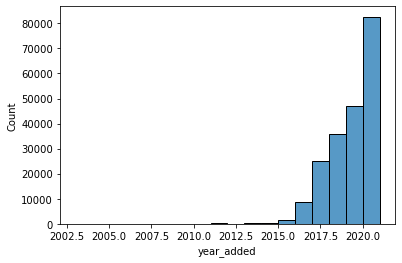

In [61]:
sns.histplot(new_df.year_added,bins =18)

In [62]:
actor_df = new_df.groupby('cast')['title'].nunique()

In [63]:
actor_df=actor_df.sort_values(ascending=False).reset_index()

In [64]:
actor_df.dropna(how='any',inplace=True)

In [65]:
actor_df

,cast,title
0,nan,825
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Julie Tejwani,33
4,Naseeruddin Shah,32
...,...,...
36435,Jamie Kenna,1
36436,Jamie Kaler,1
36437,Jamie Johnston,1
36438,Jamie Jacqueline Burns,1


In [66]:
actor_df=actor_df.drop(index=0)

In [67]:
# actor_df.loc[actor_df.title < 20,'cast'] = 'others'

In [68]:
actor_df.head()

,cast,title
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Julie Tejwani,33
4,Naseeruddin Shah,32
5,Takahiro Sakurai,32


We can say that 'Anupam Kher' is famous actor and people likes to watch his movies/tv shows

In [131]:
movie_df = new_df[new_df.type == 1]

In [137]:
movie_cast_count_df=movie_df.groupby('title')['cast'].nunique().sort_values(ascending = False).reset_index()

In [139]:
movie_cast_count_df.head()

,title,cast
0,Arthur Christmas,44
1,"Michael Bolton's Big, Sexy Valentine's Day Spe...",41
2,The Princess and the Frog,39
3,Movie 43,39
4,John Carter,38


In [145]:
movie_cast_count_df[movie_cast_count_df.cast > 2]

,title,cast
0,Arthur Christmas,44
1,"Michael Bolton's Big, Sexy Valentine's Day Spe...",41
2,The Princess and the Frog,39
3,Movie 43,39
4,John Carter,38
...,...,...
4895,Krish Trish and Baltiboy,3
4896,Benji's Very Own Christmas Story,3
4897,Krish Trish and Baltiboy: Best Friends Forever,3
4898,Krish Trish and Baltiboy: Comics of India,3


In [170]:
director_df.groupby('director')['title'].nunique().sort_values()

director
Jesse Adang         1
Lisa Arnold         1
Lisa Cortés         1
Liu Bang-yao        1
Liu Jiang           1
                 ... 
Suhas Kadav        16
Raúl Campos        19
Jan Suter          21
Rajiv Chilaka      22
nan              2634
Name: title, Length: 4994, dtype: int64

In [166]:
director_title_df

,title
director,
A. L. Vijay,2
A. Raajdheep,1
A. Salaam,1
A.R. Murugadoss,2
Aadish Keluskar,1
...,...
Éric Warin,1
Ísold Uggadóttir,1
Óskar Thór Axelsson,1


4978    2634
3749      22
1906      21
3800      19
4457      16
        ... 
635        1
2295       1
2296       1
2297       1
2957       1
Name: title, Length: 4994, dtype: int64

In [69]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202065 entries, 0 to 202064
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  int32         
 2   title         202065 non-null  object        
 3   date_added    201907 non-null  datetime64[ns]
 4   release_year  202065 non-null  int64         
 5   rating        201998 non-null  object        
 6   duration      202065 non-null  object        
 7   description   202065 non-null  object        
 8   year_added    202065 non-null  int32         
 9   director      202065 non-null  object        
 10  cast          202065 non-null  object        
 11  country       202065 non-null  object        
 12  listed_in     202065 non-null  object        
dtypes: datetime64[ns](1), int32(2), int64(1), object(9)
memory usage: 20.0+ MB


In [70]:
 new_df.groupby('title')['cast'].nunique().sort_values(ascending=False)

title
Social Distance                    50
Black Mirror                       50
Creeped Out                        47
COMEDIANS of the world             47
Heartbreak High                    47
                                   ..
Little Singham in London            1
Little Singham: Kaal Ki Tabaahi     1
The Minimighty Kids                 1
The Minimalists: Less Is Now        1
Iliza Shlesinger: War Paint         1
Name: cast, Length: 8807, dtype: int64

Social Distance and Black Mirror has more number of actors compared to all other tv shows/movies

In [71]:
new_df.listed_in.value_counts()

Dramas                          29806
International Movies            28243
Comedies                        20829
International TV Shows          12845
Action & Adventure              12216
Independent Movies               9834
Children & Family Movies         9771
TV Dramas                        8942
Thrillers                        7107
Romantic Movies                  6412
TV Comedies                      4963
Crime TV Shows                   4733
Horror Movies                    4571
Kids' TV                         4568
Sci-Fi & Fantasy                 4037
Music & Musicals                 3077
Romantic TV Shows                3049
Documentaries                    2409
Anime Series                     2313
TV Action & Adventure            2288
Spanish-Language TV Shows        2126
British TV Shows                 1808
Sports Movies                    1531
Classic Movies                   1443
TV Mysteries                     1281
Korean TV Shows                  1122
Cult Movies 

In [72]:
pd.DataFrame(new_df.groupby('title')['listed_in'].value_counts()).head(20)

listed_in
title                         listed_in                      
#Alive                        Horror Movies                 2
                              International Movies          2
                              Thrillers                     2
#AnneFrank - Parallel Stories Documentaries                 4
                              International Movies          4
#FriendButMarried             Dramas                        8
                              International Movies          8
                              Romantic Movies               8
#FriendButMarried 2           Dramas                        8
                              International Movies          8
                              Romantic Movies               8
#Roxy                         Comedies                      8
                              Romantic Movies               8
#Rucker50                     Documentaries                 1
                              Sports Movies                 1
#Selfie                       Comedies                      8
                              Dramas                        8
                              International Movies          8
#Selfie 69                    Comedies                     10
                              Dramas                       10

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year_added', ylabel='count'>

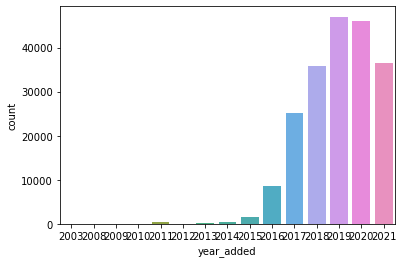

In [73]:
sns.countplot(new_df.year_added)

In [74]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202065 entries, 0 to 202064
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  int32         
 2   title         202065 non-null  object        
 3   date_added    201907 non-null  datetime64[ns]
 4   release_year  202065 non-null  int64         
 5   rating        201998 non-null  object        
 6   duration      202065 non-null  object        
 7   description   202065 non-null  object        
 8   year_added    202065 non-null  int32         
 9   director      202065 non-null  object        
 10  cast          202065 non-null  object        
 11  country       202065 non-null  object        
 12  listed_in     202065 non-null  object        
dtypes: datetime64[ns](1), int32(2), int64(1), object(9)
memory usage: 20.0+ MB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='listed_in', ylabel='year_added'>

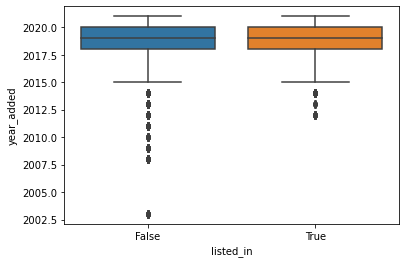

In [75]:
sns.boxplot(new_df.listed_in=='Comedies',new_df.year_added)

In [76]:
comedy = new_df[new_df.listed_in == 'Comedies']

In [77]:
comedy

,show_id,type,title,date_added,release_year,rating,duration,description,year_added,director,cast,country,listed_in
331,s10,1,The Starling,2021-09-24,2021,PG-13,104,A woman adjusting to life after a loss contend...,2021,Theodore Melfi,Melissa McCarthy,United States,Comedies
333,s10,1,The Starling,2021-09-24,2021,PG-13,104,A woman adjusting to life after a loss contend...,2021,Theodore Melfi,Chris O'Dowd,United States,Comedies
335,s10,1,The Starling,2021-09-24,2021,PG-13,104,A woman adjusting to life after a loss contend...,2021,Theodore Melfi,Kevin Kline,United States,Comedies
337,s10,1,The Starling,2021-09-24,2021,PG-13,104,A woman adjusting to life after a loss contend...,2021,Theodore Melfi,Timothy Olyphant,United States,Comedies
339,s10,1,The Starling,2021-09-24,2021,PG-13,104,A woman adjusting to life after a loss contend...,2021,Theodore Melfi,Daveed Diggs,United States,Comedies
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202032,s8806,1,Zoom,2020-01-11,2006,PG,88,"Dragged from civilian life, a former superhero...",2020,Peter Hewitt,Ryan Newman,United States,Comedies
202034,s8806,1,Zoom,2020-01-11,2006,PG,88,"Dragged from civilian life, a former superhero...",2020,Peter Hewitt,Michael Cassidy,United States,Comedies
202036,s8806,1,Zoom,2020-01-11,2006,PG,88,"Dragged from civilian life, a former superhero...",2020,Peter Hewitt,Spencer Breslin,United States,Comedies
202038,s8806,1,Zoom,2020-01-11,2006,PG,88,"Dragged from civilian life, a former superhero...",2020,Peter Hewitt,Rip Torn,United States,Comedies


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='listed_in', ylabel='year_added'>

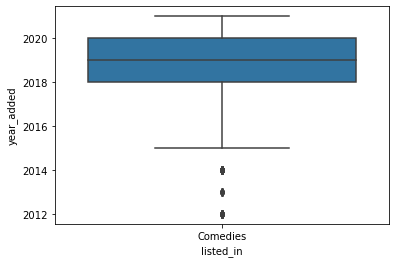

In [78]:
sns.boxplot(comedy.listed_in,new_df.year_added)

In [79]:
comedy.groupby('title')['country'].nunique().sort_values(ascending=False)

title
Arctic Dogs                              7
The Death of Stalin                      5
Houston, We Have a Problem!              5
A Shaun the Sheep Movie: Farmageddon     5
The Lobster                              5
                                        ..
House Party                              1
House Arrest                             1
Hotel Transylvania 3: Summer Vacation    1
Hot Rod                                  1
الف مبروك                                1
Name: country, Length: 1674, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='year_added'>

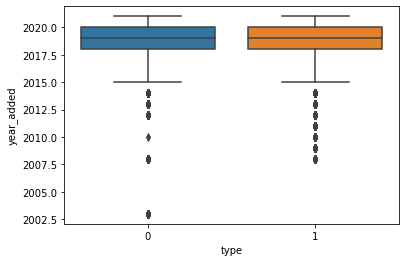

In [80]:
sns.boxplot(new_df.type,new_df.year_added)

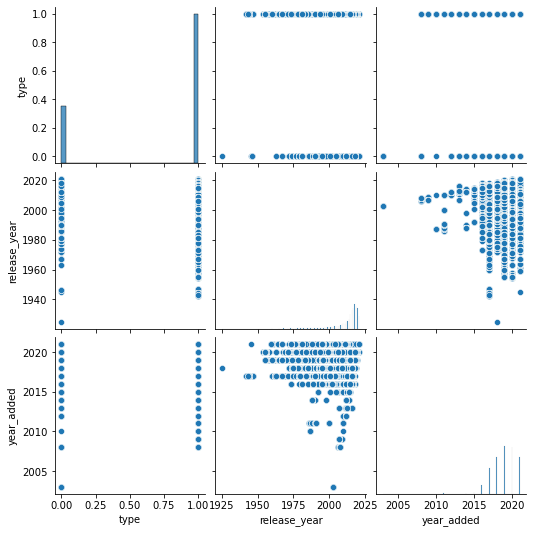

In [81]:
sns.pairplot(new_df)

In [123]:
country_df.country.value_counts()

United States     3690
India             1046
nan                831
United Kingdom     806
Canada             445
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Name: country, Length: 124, dtype: int64

In [125]:
listed_in_df.listed_in.value_counts()

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

In [82]:
new_df.head()

,show_id,type,title,date_added,release_year,rating,duration,description,year_added,director,cast,country,listed_in
0,s1,1,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",2021,Kirsten Johnson,nan,United States,Documentaries
1,s2,0,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,nan,Ama Qamata,South Africa,International TV Shows
2,s2,0,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,nan,Ama Qamata,South Africa,TV Dramas
3,s2,0,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,nan,Ama Qamata,South Africa,TV Mysteries
4,s2,0,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,nan,Khosi Ngema,South Africa,International TV Shows


In [83]:
new_df.loc[new_df.date_added.isna()]

,show_id,type,title,date_added,release_year,rating,duration,description,year_added,director,cast,country,listed_in
136940,s6067,0,A Young Doctor's Notebook and Other Stories,NaT,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ...",2013,nan,Daniel Radcliffe,United Kingdom,British TV Shows
136941,s6067,0,A Young Doctor's Notebook and Other Stories,NaT,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ...",2013,nan,Daniel Radcliffe,United Kingdom,TV Comedies
136942,s6067,0,A Young Doctor's Notebook and Other Stories,NaT,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ...",2013,nan,Daniel Radcliffe,United Kingdom,TV Dramas
136943,s6067,0,A Young Doctor's Notebook and Other Stories,NaT,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ...",2013,nan,Jon Hamm,United Kingdom,British TV Shows
136944,s6067,0,A Young Doctor's Notebook and Other Stories,NaT,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ...",2013,nan,Jon Hamm,United Kingdom,TV Comedies
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186965,s8183,0,The Adventures of Figaro Pho,NaT,2015,TV-Y7,2 Seasons,"Imagine your worst fears, then multiply them: ...",2015,nan,Charlotte Hamlyn,Australia,TV Comedies
186966,s8183,0,The Adventures of Figaro Pho,NaT,2015,TV-Y7,2 Seasons,"Imagine your worst fears, then multiply them: ...",2015,nan,Stavroula Mountzouris,Australia,Kids' TV
186967,s8183,0,The Adventures of Figaro Pho,NaT,2015,TV-Y7,2 Seasons,"Imagine your worst fears, then multiply them: ...",2015,nan,Stavroula Mountzouris,Australia,TV Comedies
186968,s8183,0,The Adventures of Figaro Pho,NaT,2015,TV-Y7,2 Seasons,"Imagine your worst fears, then multiply them: ...",2015,nan,Aletheia Burney,Australia,Kids' TV


In [84]:
moviesreleased_df = new_df.groupby('year_added')['title'].count().reset_index()

<AxesSubplot:xlabel='year_added', ylabel='title'>

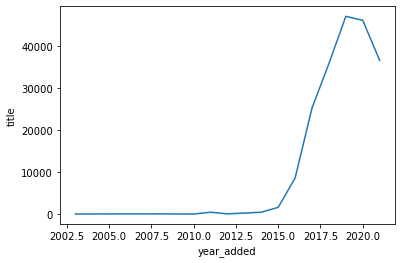

In [85]:
sns.lineplot(x=moviesreleased_df.year_added,y=moviesreleased_df.title)

In [86]:
new_df.head()

,show_id,type,title,date_added,release_year,rating,duration,description,year_added,director,cast,country,listed_in
0,s1,1,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",2021,Kirsten Johnson,nan,United States,Documentaries
1,s2,0,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,nan,Ama Qamata,South Africa,International TV Shows
2,s2,0,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,nan,Ama Qamata,South Africa,TV Dramas
3,s2,0,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,nan,Ama Qamata,South Africa,TV Mysteries
4,s2,0,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,nan,Khosi Ngema,South Africa,International TV Shows


In [87]:
new_df['month'] = pd.to_datetime(new_df['date_added']).dt.month.astype('Int32')

In [88]:
new_df

,show_id,type,title,date_added,release_year,rating,duration,description,year_added,director,cast,country,listed_in,month
0,s1,1,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",2021,Kirsten Johnson,nan,United States,Documentaries,9
1,s2,0,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,nan,Ama Qamata,South Africa,International TV Shows,9
2,s2,0,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,nan,Ama Qamata,South Africa,TV Dramas,9
3,s2,0,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,nan,Ama Qamata,South Africa,TV Mysteries,9
4,s2,0,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,nan,Khosi Ngema,South Africa,International TV Shows,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,1,Zubaan,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,2019,Mozez Singh,Anita Shabdish,India,International Movies,3
202061,s8807,1,Zubaan,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,2019,Mozez Singh,Anita Shabdish,India,Music & Musicals,3
202062,s8807,1,Zubaan,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,2019,Mozez Singh,Chittaranjan Tripathy,India,Dramas,3
202063,s8807,1,Zubaan,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,2019,Mozez Singh,Chittaranjan Tripathy,India,International Movies,3


In [89]:

new_df.loc[new_df.title == 'A Young Doctor\'s Notebook and Other Stories']

,show_id,type,title,date_added,release_year,rating,duration,description,year_added,director,cast,country,listed_in,month
136940,s6067,0,A Young Doctor's Notebook and Other Stories,NaT,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ...",2013,nan,Daniel Radcliffe,United Kingdom,British TV Shows,<NA>
136941,s6067,0,A Young Doctor's Notebook and Other Stories,NaT,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ...",2013,nan,Daniel Radcliffe,United Kingdom,TV Comedies,<NA>
136942,s6067,0,A Young Doctor's Notebook and Other Stories,NaT,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ...",2013,nan,Daniel Radcliffe,United Kingdom,TV Dramas,<NA>
136943,s6067,0,A Young Doctor's Notebook and Other Stories,NaT,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ...",2013,nan,Jon Hamm,United Kingdom,British TV Shows,<NA>
136944,s6067,0,A Young Doctor's Notebook and Other Stories,NaT,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ...",2013,nan,Jon Hamm,United Kingdom,TV Comedies,<NA>
136945,s6067,0,A Young Doctor's Notebook and Other Stories,NaT,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ...",2013,nan,Jon Hamm,United Kingdom,TV Dramas,<NA>
136946,s6067,0,A Young Doctor's Notebook and Other Stories,NaT,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ...",2013,nan,Adam Godley,United Kingdom,British TV Shows,<NA>
136947,s6067,0,A Young Doctor's Notebook and Other Stories,NaT,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ...",2013,nan,Adam Godley,United Kingdom,TV Comedies,<NA>
136948,s6067,0,A Young Doctor's Notebook and Other Stories,NaT,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ...",2013,nan,Adam Godley,United Kingdom,TV Dramas,<NA>
136949,s6067,0,A Young Doctor's Notebook and Other Stories,NaT,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ...",2013,nan,Christopher Godwin,United Kingdom,British TV Shows,<NA>


In [90]:
new_df.month=new_df.month.fillna(0)

In [91]:
new_df.month.isna().sum()

0

In [92]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [93]:
df['month'] = pd.to_datetime(df['date_added']).dt.month

In [94]:
month_release=df.groupby('month')['year_added'].count().reset_index()

In [95]:
month_release.columns=['month','count']

<AxesSubplot:xlabel='month', ylabel='count'>

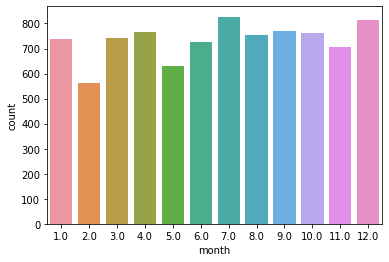

In [96]:
sns.barplot(x="month", y="count", data=month_release)

<AxesSubplot:xlabel='type', ylabel='Count'>

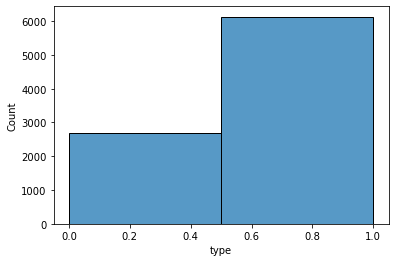

In [97]:
sns.histplot(df.type,bins=2)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   int32         
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8807 non-null   int32         
 13  month         8797 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(9)
memory usage: 894.6+ KB


In [99]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202065 entries, 0 to 202064
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  int32         
 2   title         202065 non-null  object        
 3   date_added    201907 non-null  datetime64[ns]
 4   release_year  202065 non-null  int64         
 5   rating        201998 non-null  object        
 6   duration      202065 non-null  object        
 7   description   202065 non-null  object        
 8   year_added    202065 non-null  int32         
 9   director      202065 non-null  object        
 10  cast          202065 non-null  object        
 11  country       202065 non-null  object        
 12  listed_in     202065 non-null  object        
 13  month         202065 non-null  Int32         
dtypes: Int32(1), datetime64[ns](1), int32(2), int64(1), object(9)
memory

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year_added', ylabel='Density'>

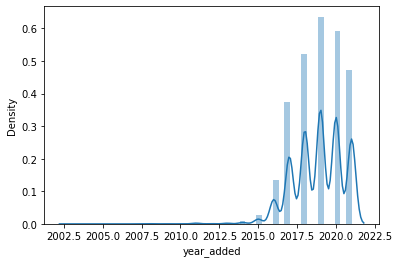

In [100]:
sns.distplot(df.year_added)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year_added', ylabel='count'>

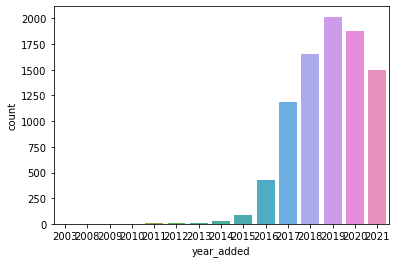

In [101]:
sns.countplot(df.year_added)

<AxesSubplot:xlabel='year_added', ylabel='Count'>

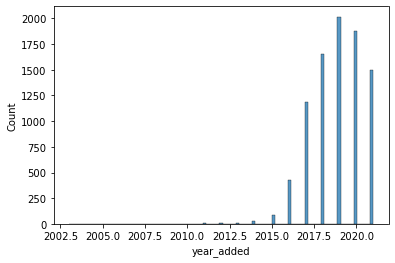

In [102]:
sns.histplot(df.year_added)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

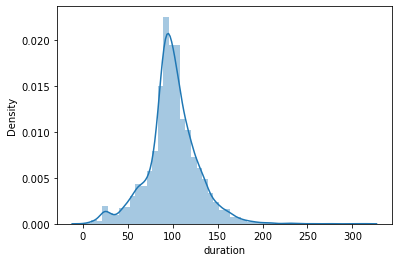

In [103]:
sns.distplot(duration_df.duration)

<AxesSubplot:xlabel='duration', ylabel='Count'>

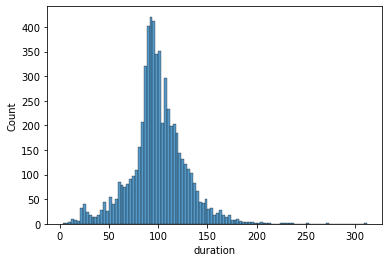

In [104]:
sns.histplot(duration_df.duration)

<AxesSubplot:xlabel='duration'>

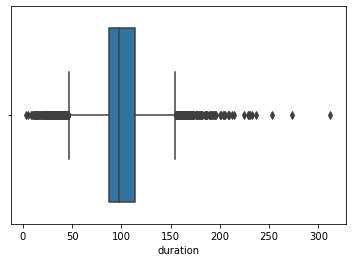

In [120]:
sns.boxplot(x=duration_df['duration'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='month', ylabel='Density'>

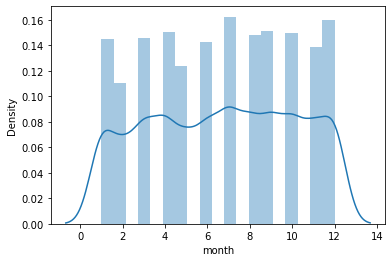

In [105]:
sns.distplot(df.month)

<AxesSubplot:xlabel='year_added'>

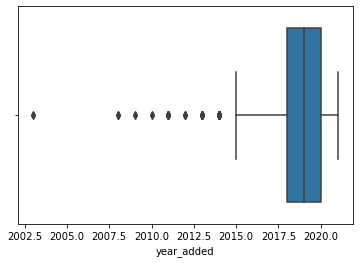

In [106]:
sns.boxplot(x=df["year_added"])

<AxesSubplot:xlabel='month'>

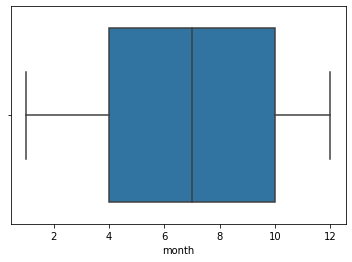

In [107]:
sns.boxplot(x=df["month"])

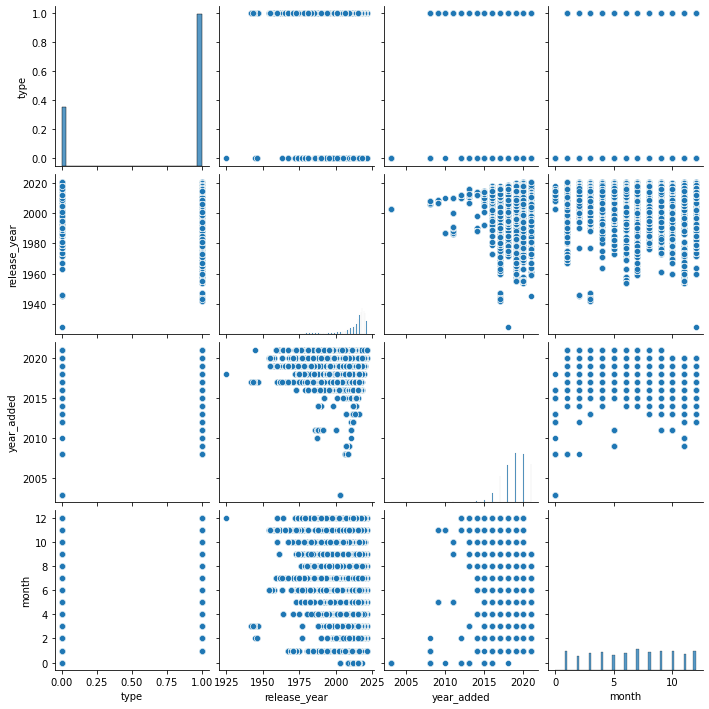

In [108]:
sns.pairplot(new_df)

In [109]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202065 entries, 0 to 202064
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  int32         
 2   title         202065 non-null  object        
 3   date_added    201907 non-null  datetime64[ns]
 4   release_year  202065 non-null  int64         
 5   rating        201998 non-null  object        
 6   duration      202065 non-null  object        
 7   description   202065 non-null  object        
 8   year_added    202065 non-null  int32         
 9   director      202065 non-null  object        
 10  cast          202065 non-null  object        
 11  country       202065 non-null  object        
 12  listed_in     202065 non-null  object        
 13  month         202065 non-null  Int32         
dtypes: Int32(1), datetime64[ns](1), int32(2), int64(1), object(9)
memory

In [110]:
heat_df = new_df[['type','release_year','year_added']]

# Missing Value & Outlier check (Treatment optional) (10 Points)

In [111]:
df.release_year.value_counts().reset_index().sort_values('index').head()

,index,release_year
70,1925,1
67,1942,2
58,1943,3
54,1944,3
53,1945,4


we can see that after 1925 there are no movies/tv shows released till 1942, so we can consider that 1925 as an outlier and take possible actions

In [112]:
outlier_year = df.year_added.value_counts().reset_index()

In [113]:
outlier_year.head()

,index,year_added
0,2019,2016
1,2020,1879
2,2018,1650
3,2021,1498
4,2017,1188


In [114]:
outlier_year.sort_values('index')

,index,year_added
13,2003,2
11,2008,3
12,2009,2
14,2010,2
8,2011,13
10,2012,4
9,2013,12
7,2014,24
6,2015,84
5,2016,430


<AxesSubplot:xlabel='year_added'>

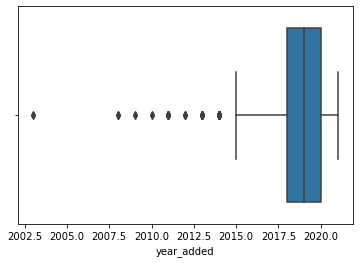

In [119]:
sns.boxplot(x=df["year_added"])

From above we can say that no content was upoloaded to Netflix during 2004-2007, so we can consider 2003 as an outlier 
and in above plot we can see outliers till 2015

<AxesSubplot:xlabel='duration'>

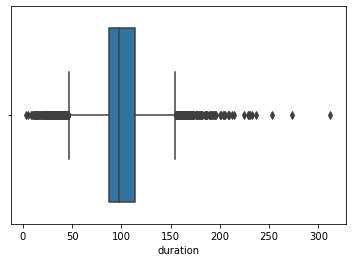

In [121]:
sns.boxplot(x=duration_df['duration'])

we can see there are many outliers in the duration of the movies

# 6. Insights based on Non-Graphical and Visual Analysis (10 Points)

# 6.1 Comments on the range of attributes
# 6.2 Comments on the distribution of the variables and relationship between them
# 6.3 Comments for each univariate and bivariate plot

# 7. Business Insights (10 Points) - Should include patterns observed in the data along with what you can infer from it

# 8. Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand